# Lecture 23 practice

This notebook is built to help you practice using Chebyshev's criterion numerically to perform model fitting. We'll focus on models that are either linear or can linearized using a transformation.

## Import needed packages

These statements only need to be run once at the beginning of the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define any functions that will be needed

Here I will define a function that helps you use Chebyshev's criterion to perform a fit. Like visual fitting, you will experiment with different parameter values.

In [2]:
def chebyshev_fit_linear(x_in, data_in, m_in, b_in, xpred_in, display_table=True):
    # get some information from stuff passed in
    nd = len(x_in) # get number of data points
    npred = len(xpred_in) # get length of array to use for x predictions
    ypred = np.empty(npred) # create an array to store model predictions
    
    # make predictions at the values in xpred_in
    for i in range(0, npred):
        ypred[i] = m_in * xpred_in[i] + b_in
        
    # create a label for the slope and intercept to show on the plot
    # uses string formatting for the numbers
    # the :.2f means floating point number, round to 2 decimal places
    ypred_label = '$m = ' + '{:.2f}'.format(m_in) \
                + '$, $ b = ' +  '{:.2f}'.format(b_in) + '$'
    
    # calculate absolute errors and find the biggest one in the list
    abs_err = np.empty(nd)
    biggest_err = -1 # placeholder for biggest error
    x_idx_where_biggest = 0 # placeholder for index of biggest error
    if display_table:
        print('{: >20}'.format('x value'),'{: >20}'.format('residual'))
    for i in range(0, nd):
        abs_err[i] = abs(data_in[i] - (m_in*x_in[i] + b_in))
        if display_table:
            print('{:20.4f}'.format(x_in[i]),'{:20.4f}'.format(abs_err[i]))
        if abs_err[i] > biggest_err:
            biggest_err = abs_err[i]
            x_idx_where_biggest = i
    print('Largest absolute error is r =', '{:.2f}'.format(biggest_err),'\n',
         'It occurs when x = ', '{:.4f}'.format(x_in[x_idx_where_biggest]))
        
    # make plot of predictions with data
    plt.plot(x_in, data_in,'o');
    plt.plot(xpred_in, ypred, '+', color='orange', label=ypred_label);
    # overlay the plot with the x y pair where the absolute error is biggest
    plt.plot(x_in[x_idx_where_biggest], data_in[x_idx_where_biggest],'o', color='red');
    plt.xlabel(r'$x$ variable', fontsize=14);
    plt.ylabel(r'$y$ variable', fontsize=14);
    # plot x and y axes to see more easily
    plt.axhline(0,linestyle='--',color='grey');
    plt.axvline(0,linestyle='--',color='grey');
    plt.legend(fontsize=12)

## Example 1

In this first example I will set up some random test data. If you are doing this for a lab, you'll either need to enter your data here or read the data in from a file.

### Generate the random data and plot it to see what it looks like

In [3]:
np.random.seed(1) # this makes sure the random values are the same every time you run the notebook
# set up evenly spaced x values
n_test_1 = 20
xvals_test_1 = np.linspace(-1,3,num=n_test_1)
yvals_test_1 = np.random.random(n_test_1)

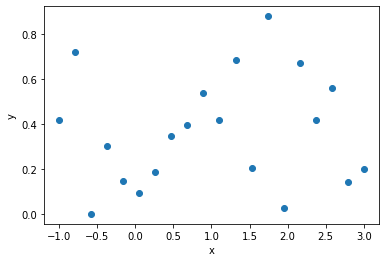

In [4]:
# plot the test data
plt.plot(xvals_test_1, yvals_test_1, 'o');
plt.xlabel('x');
plt.ylabel('y');

### Set up an array of x values to predict the model at

In [5]:
npred_1 = 50
# make this range a bit larger than where we have data
xpred_1 = np.linspace(-2,4,num=npred_1)

### Use the function defined above to implement Chebyshev's criterion

             x value             residual
             -1.0000               0.1220
             -0.7895               0.4137
             -0.5789               0.3180
             -0.3684               0.0274
             -0.1579               0.1946
              0.0526               0.2606
              0.2632               0.1782
              0.4737               0.0305
              0.6842               0.0091
              0.8947               0.1396
              1.1053               0.0084
              1.3158               0.2629
              1.5263               0.2295
              1.7368               0.4326
              1.9474               0.4297
              2.1579               0.2018
              2.3684               0.0630
              2.5789               0.0668
              2.7895               0.3630
              3.0000               0.3169
Largest absolute error is r = 0.43 
 It occurs when x =  1.7368


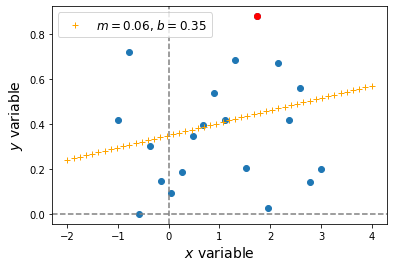

In [6]:
chebyshev_fit_linear(xvals_test_1, yvals_test_1, 0.055, 0.35, xpred_1, display_table=True)

The best I was able to get by playing with values was a slope $m=0.06$, intercept $b=0.35$, with a maximum absolute error $r=0.43$. Did you get something better than me? I'd be curious to know.

## Setting up the problem as a linear program

Fitting a straight-line model $y=mx+b$ can be set up as a linear program for use with something like the simplex method.

Let each measured data point be $(x_i,y_i)$ and let $i=1,2,\ldots, m$. 

Then the $i$th absolute error (absolute residual) is given by

$$ |r_i| = |(m x_i + b) - y_i| $$

Let $r$ be defined as the largest of the list $\{|r_i|\}$. If $r$ is the largest, that implies that all the $r_i$'s must be less than or equal to $r$.

$$ |r_i| \leq r $$

This single inequality for each data point is can also be expressed as

$$ -r \leq r_i \leq r $$

which can be separated into two simultaneous inequalities

$$ r + r_i \geq 0, \quad \mbox{and} \quad r - r_i \geq 0 $$

For each of the $m$ total data points, we have two inequalities. Writing this out in more detail for our straight-line model, we have

$$ r + m x_i + b - y_i \geq 0 $$

$$ r - m x_i - b + y_i \geq 0 $$

so that there are $2 m$ total inequalities.

Our example above has 20 (!) data points, so we would have a whopping 40 inequalities!

This is one reason computer programming exists! No one is gonna type out all 40 inequalities or be able to find the right $r$, $m$, and $b$ values that satisfy them by hand!

### The Goal

The goal in the end is to determine the *optimal* values of $m$, $b$, and $r$ that satisfy all of these inequalities. An additional constraint we have is that $r \geq 0$ because it is an absolute error. $m$ and $b$ can range over all real numbers.

## Linear programming in Python

If you are curious how to do this in Python, the package scipy has a function that will solve such problems, if you input the information correctly. I will define a function below that does it for us. I will warn you that it's messy because the `scipy.optimize.linprog` function takes input in a really specific way, so I have to construct matrices and vectors to pass in.

In [7]:
from scipy.optimize import linprog

In [8]:
def chebyshev_linprog_fit_linear(x_in, data_in, xpred_in, m_guess, b_guess):
    nd = len(x_in) # get number of data points
    npred = len(xpred_in)
    ypred = np.empty(npred)
    # construct a matrix to pass into the linprog function
    Aub_mx = np.empty([2*nd, 3]) # matrix with 2*nd rows and 3 columns
    bub_vec = np.empty([2*nd,1]) # a 2*nd element long column vector
    c_vec = np.ones(3) # a list of 3 ones that the linprog function needs
    
    # construct the Aub_mx, use nested for loops
    for i in range(0, 3): # columns
        data_index = 0
        for j in range(0, 2*nd): # rows
            if i == 0: # the first column
                Aub_mx[j,i] = -1
            elif i == 1: # second column (coefficients of m)
                if j%2 == 0: # if j is even
                    Aub_mx[j,i] = -x_in[data_index]
                else: # if j is odd
                    Aub_mx[j,i] = x_in[data_index]
            elif i == 2: # third column (coefficients of b)
                if j%2 == 0:
                    Aub_mx[j,i] = -1
                else:
                    Aub_mx[j,i] = 1
                    
            if j%2 != 0: # increment the data index on odd j values
                data_index += 1
    
    # construct the bub_vec
    data_index = 0
    for j in range(0, 2*nd):
        if j%2 == 0:
            bub_vec[j] = -data_in[data_index]
        else:
            bub_vec[j] = data_in[data_index]
            data_index += 1
    #print(bub_vec)
    
    # construct bounds for the decision variables
    # constrain m and b close to your guesses to keep the optimizer from wandering off
    bounds = [(0,10),\
              (m_guess-0.33*abs(m_guess),m_guess + 0.33*abs(m_guess)),\
              (b_guess-0.33*abs(b_guess),b_guess + 0.33*abs(b_guess))]
    
    res = linprog(c_vec, A_ub=Aub_mx, b_ub=bub_vec, bounds=bounds, method='revised simplex')
    
    biggest_err = res.x[0]
    m_val = res.x[1]
    b_val = res.x[2]
    
    
    if res.status == 0:
        print('After', res.nit, 'iterations...')
        print('The optimization was successful! Here are the values it found:')
        print('{: >10}'.format('r ='),'{:10.4f}'.format(res.x[0]))
        print('{: >10}'.format('m ='),'{:10.4f}'.format(res.x[1]))
        print('{: >10}'.format('b ='),'{:10.4f}'.format(res.x[2]))
    else:
        print('The optimization was not successful. Here is the error message:')
        print(res.message)
    
    ypred_label = '$m = ' + '{:.2f}'.format(m_val) \
                + '$, $ b = ' +  '{:.2f}'.format(b_val) + '$'
    
    # double-check the biggest error calculation
    abs_err = np.empty(nd)
    biggest_err_check = -1
    x_idx_where_biggest = -1
    for i in range(0, nd):
        abs_err[i] = abs(data_in[i] - (m_val*x_in[i] + b_val))
        #print('{:20.4f}'.format(x_in[i]),'{:20.4f}'.format(abs_err[i]))
        if abs_err[i] > biggest_err_check:
            biggest_err_check = abs_err[i]
            x_idx_where_biggest = i
    print('Check: Largest absolute error is r =', '{:.2f}'.format(biggest_err_check),'\n',
         'It occurs when x = ', '{:.4f}'.format(x_in[x_idx_where_biggest]))     
    
    # make predictions at the values in xpred_in
    for i in range(0, npred):
        ypred[i] = m_val * xpred_in[i] + b_val
    
    # make plot of predictions with data
    plt.plot(x_in, data_in,'o');
    plt.plot(xpred_in, ypred, '+', color='orange', label=ypred_label);
    # overlay the plot with the x y pair where the absolute error is biggest
    plt.plot(x_in[x_idx_where_biggest], data_in[x_idx_where_biggest],'o', color='red');
    plt.xlabel(r'$x$ variable', fontsize=14);
    plt.ylabel(r'$y$ variable', fontsize=14);
    # plot x and y axes to see more easily
    plt.axhline(0,linestyle='--',color='grey');
    plt.axvline(0,linestyle='--',color='grey');
    plt.legend(fontsize=12)

After 21 iterations...
The optimization was successful! Here are the values it found:
       r =     0.4319
       m =     0.0625
       b =     0.3377
Check: Largest absolute error is r = 0.43 
 It occurs when x =  1.9474


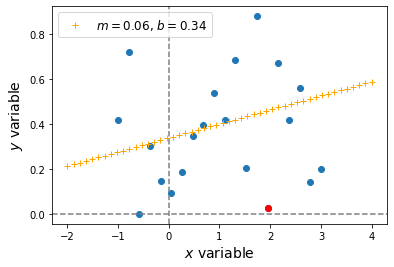

In [9]:
chebyshev_linprog_fit_linear(xvals_test_1, yvals_test_1, xpred_1, 0.05, 0.4)

Wow that was a lot of work to get a worse [censored] answer!

## Try it on your own

Given the following data, set up an array of test predictions and use Chebyshev's criterion to perform a numerical fit of the parameters.

In [10]:
n_test_2 = 15
x_test_2 = np.linspace(0,1,num=n_test_2)
# generate test data from the line y = 3x+4 on the x values set up above
# random noise is added in
np.random.seed(10)
y_test_2 = np.array([3*x + 4 + np.random.normal() for x in x_test_2])

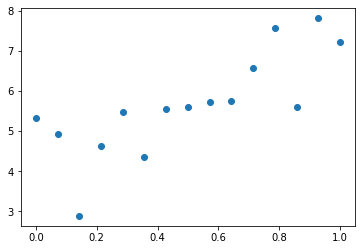

In [11]:
plt.plot(x_test_2, y_test_2, 'o')

Set up a prediction array and then perform the fit with the `chebyshev_fit_linear` function

In [12]:
npred_2 = 50
xpred_2 = np.linspace(-0.5, 1.5, num=npred_2)

             x value             residual
              0.0000               1.4316
              0.0714               0.8167
              0.1429               1.4425
              0.2143               0.0959
              0.2857               0.7271
              0.3571               0.6129
              0.4286               0.3741
              0.5000               0.2185
              0.5714               0.1157
              0.6429               0.0617
              0.7143               0.5473
              0.7857               1.3188
              0.8571               0.8479
              0.9286               1.1468
              1.0000               0.3486
Largest absolute error is r = 1.44 
 It occurs when x =  0.1429


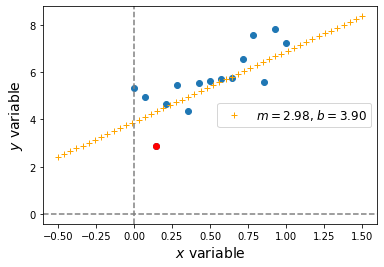

In [13]:
chebyshev_fit_linear(x_test_2, y_test_2, 2.98, 3.9, xpred_2, display_table=True)

After 15 iterations...
The optimization was successful! Here are the values it found:
       r =     1.7140
       m =     1.9430
       b =     4.3196
Check: Largest absolute error is r = 1.71 
 It occurs when x =  0.1429


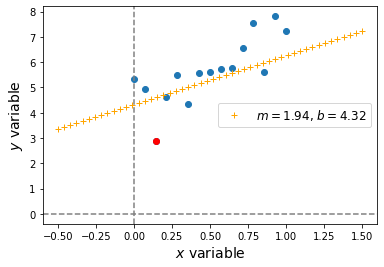

In [14]:
chebyshev_linprog_fit_linear(x_test_2, y_test_2, xpred_2, 2.9, 3.9)

:(
Sometimes in life you must accept that you can do a better job than the fancy algorithm. This behaves unpredictably and doesn't usually even work without the `m_guess` and `b_guess` at the end. Go figure.

## Keep working on it... try it with `lecture20_file1.npz` data

Use the `lecture20_file1.npz` data used in the last practice notebook. The proposed model is an exponential $y = Ce^{kx}$. Linearize the data similar to what we did in the Lecture 20 practice and then perform the linear Chebyshev fit using the `chebyshev_fit_linear` function.

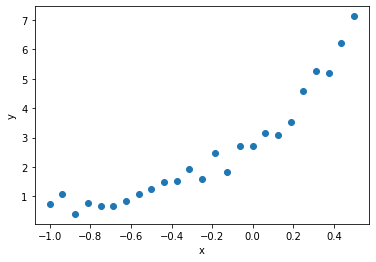

In [15]:
contents_3 = np.load('lecture20_file1.npz')
x_test_3 = contents_3['xvals']
y_test_3 = contents_3['data']
plt.plot(x_test_3, y_test_3, 'o');
plt.xlabel('x');
plt.ylabel('y');

## Linearize the data

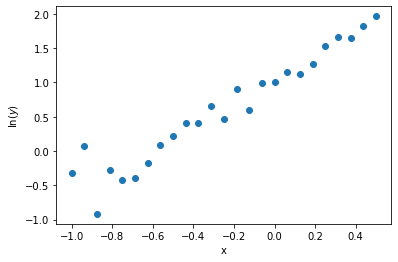

In [16]:
ln_y_test_3 = np.log(y_test_3)
plt.plot(x_test_3, ln_y_test_3, 'o');
plt.xlabel('x');
plt.ylabel('$\ln(y)$');

## Use the Chebyshev criterion on the linearized data

In [17]:
n_pred_3 = 50
x_pred_3 = np.linspace(-1.5, 1, num=n_pred_3)

             x value             residual
             -1.0000               0.2829
             -0.9375               0.5611
             -0.8750               0.5356
             -0.8125               0.0089
             -0.7500               0.2531
             -0.6875               0.3416
             -0.6250               0.2244
             -0.5625               0.0774
             -0.5000               0.0576
             -0.4375               0.0195
             -0.3750               0.0845
             -0.3125               0.0473
             -0.2500               0.2428
             -0.1875               0.0778
             -0.1250               0.3332
             -0.0625               0.0473
              0.0000               0.1504
              0.0625               0.1072
              0.1250               0.2394
              0.1875               0.2127
              0.2500               0.0630
              0.3125               0.0358
              0.3750              

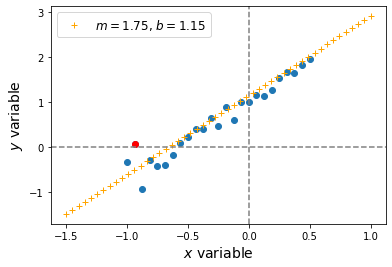

In [18]:
chebyshev_fit_linear(x_test_3, ln_y_test_3, 1.75, 1.15, x_pred_3, display_table=True)

After 27 iterations...
The optimization was successful! Here are the values it found:
       r =     0.6614
       m =     1.1725
       b =     0.7705
Check: Largest absolute error is r = 0.66 
 It occurs when x =  -0.8750


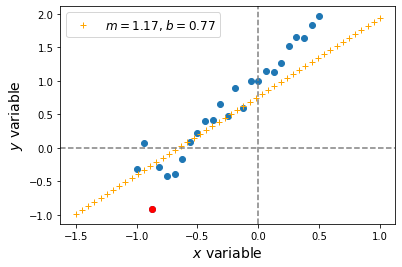

In [19]:
chebyshev_linprog_fit_linear(x_test_3, ln_y_test_3, x_pred_3, 1.75, 1.15)

I started the linear programming algorithm at the same spot (with a better value of $r$) and the algorithm still wandered off to la-la land, actually getting a *worse* answer!

Anyway, let's keep the result from the "better" approximate analysis

$k = 1.75,\quad \ln C = 1.15$

That means that

$C = e^{1.15}$

In [20]:
k_val = 1.75
C_val = np.exp(1.15)

y_pred_3 = np.empty(n_pred_3)
for i in range(0,n_pred_3):
    y_pred_3[i] = C_val * np.exp(k_val * x_pred_3[i])

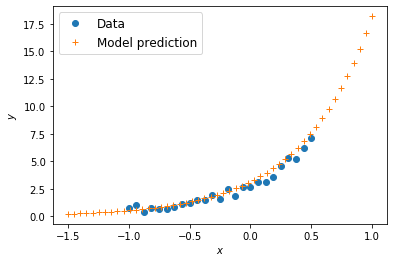

In [21]:
plt.plot(x_test_3, y_test_3, 'o', label='Data');
plt.plot(x_pred_3, y_pred_3, '+', label='Model prediction')
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.legend(fontsize=12);

Looks good!